In [2]:
import pandas as pd
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Importing two file covid_data_death and covid_data_vacinations as two dataframes.

In [3]:
covid19_deaths = pd.read_csv("covid_data_death.csv")
covid19_deaths.head()

,iso_code,continent,location,population,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,41128772,03/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,41128772,04/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,41128772,05/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,41128772,06/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,41128772,07/01/2020,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
covid19_vac = pd.read_csv("covid_data_vacinations.csv")
covid19_vac.head()

,iso_code,continent,location,date,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,03/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,04/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,05/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,06/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,07/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


DATA EXPLORATION

In [ ]:
covid19_vac.columns
# 45 columns

In [11]:
# covid19_vac.info()
# covid19_vac.isna().sum()

covid19_vac.shape
#output: (325411, 45)

(325411, 45)

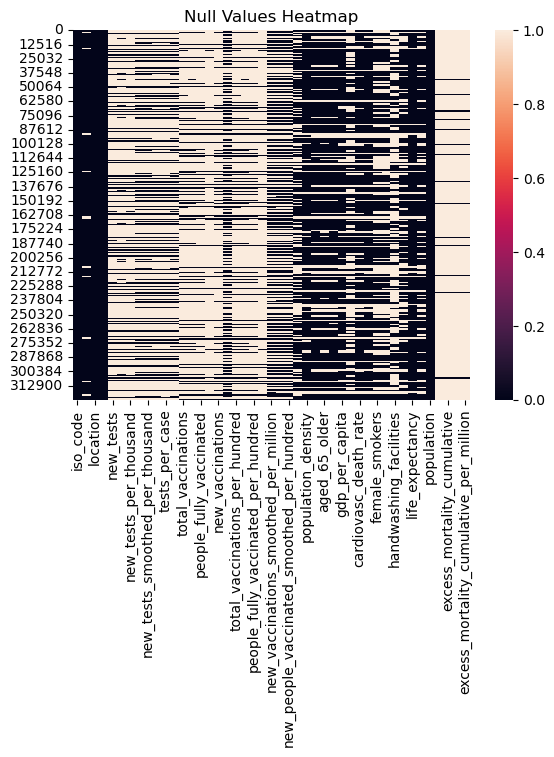

In [8]:
sns.heatmap(covid19_vac.isnull())
plt.title('Null Values Heatmap')
plt.show()

In [18]:
# FROM THE FILE covid_data_vacinations.csv

# find unique value in the column 'continent' 
# covid19_vac.continent.unique()

# the column 'location' have continents in it so we will separate the countries from continents
# covid19_vac.location.unique()
# 255 values

# find the continent values in the column 'location'
covid19_vac.loc[covid19_vac['location'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])]
# 7722 rows

covid19_vac2 = covid19_vac.copy()

# Create a mask to identify rows with continent names
continent_mask = covid19_vac2['location'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
continents_df = covid19_vac2[continent_mask].sort_values(by='location').reset_index(drop=True)
continents_df.to_csv('continents_data.csv', index=False)

In [19]:
# not in pandas
# covid19_vac.loc[~covid19_vac['location'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])]
# 317689 rows
countries_df = covid19_vac2[~continent_mask].sort_values(by='location').reset_index(drop=True)
countries_df.to_csv('countries_data.csv', index=False)

In [21]:
# to counter check record 
country_data = pd.read_csv("countries_data.csv")
# country_data.head()
country_data.shape

(317689, 45)

In [26]:
country_data.continent.unique() #or country_data['continent'].unique()
# country_data.location.unique()

# check if the continents are cleaned out 
country_data.loc[country_data['location'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])]

,iso_code,continent,location,date,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
